Lets create a Model to predict the vehical is 'Car', 'Truck',or 'Motorcycle' according to its (Weight), Engine Size and (Origin) .

Target (y): Vehicle_Type (Classes: 0='Car', 1='Truck', 2='Motorcycle') 

Multi-classFeatures (X):Weight_kg (Numeric)Engine_CC (Numeric)Origin (Categorical) for  One-Hot Encoding

In [46]:
#Libraries Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# 'ColumnTransformer' සහ 'Pipeline' දේවල් පහසු කරන්න import කරගමු
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [47]:
#Sample Data Set
np.random.seed(42)
n_samples = 1000

# 1. Features හදනවා
Weight_kg = np.random.normal(1500, 500, n_samples)
Engine_CC = np.random.normal(2000, 800, n_samples)
Origin = np.random.choice(['Local', 'Imported_Asia', 'Imported_Europe'], n_samples)

# 2. Target (y) හදනවා (Classes: 0=Car, 1=Truck, 2=Motorcycle)
conditions = [
    (Weight_kg < 500) & (Engine_CC < 1000),
    (Weight_kg > 2000) & (Engine_CC > 2500)
]
choices = [2, 1] # 2=Motorcycle, 1=Truck
Vehicle_Type = np.select(conditions, choices, default=0) # 0=Car

# DataFrame එක හදනවා
df = pd.DataFrame({
    'Weight_kg': Weight_kg,
    'Engine_CC': Engine_CC,
    'Origin': Origin,
    'Vehicle_Type': Vehicle_Type
})

# Class balance එක බලමු (සමාන නැති වුණාට කමක් නැහැ)
print("the number of samples in each class:")
print(df['Vehicle_Type'].value_counts())

print(df.head(5))

the number of samples in each class:
Vehicle_Type
0    962
1     38
Name: count, dtype: int64
     Weight_kg    Engine_CC           Origin  Vehicle_Type
0  1748.357077  3119.484349    Imported_Asia             0
1  1430.867849  2739.706946  Imported_Europe             0
2  1823.844269  2047.704296    Imported_Asia             0
3  2261.514928  1482.450578  Imported_Europe             0
4  1382.923313  2558.578651  Imported_Europe             0


In [48]:
#Train/Test Split

# X = Target ('Vehicle_Type') හැර අනිත් සියල්ල
X = df.drop('Vehicle_Type', axis=1)
# y = Target එක
y = df['Vehicle_Type']

# 80% / 20% ලෙස දත්ත බෙදනවා
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Preprocessing Pipeline**

we have to do 2 things:

1.Numeric Features (Weight_kg, Engine_CC) ---> StandardScaler

2.Categorical Feature (Origin)---> OneHotEncoder 

to apply both into X_train , the perfect way is ColumnTransfomer and Pipeline

In [49]:
# 1. Numeric features ටික අඳුරගන්නවා
numeric_features = ['Weight_kg', 'Engine_CC']
# 2. Categorical features ටික අඳුරගන්නවා
categorical_features = ['Origin']

# 3. Numeric data වලට 'transformer' එක හදනවා
# (StandardScaler)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 4. Categorical data වලට 'transformer' එක හදනවා
# (OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # අලුත් data ආවොත් error නොවී ignore කරයි
])

# 5. මේ transformer දෙක 'ColumnTransformer' එකකින් එකතු කරනවා
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

processed_data = preprocessor.fit_transform(df)
print("\n--- Process කරපු Data එක (NumPy Array එකක් විදිහට) ---")
print(processed_data)

# 7. (වැදගත්ම) මේ අලුත් columns මොනවද කියලා බලාගැනීම
# processed_data එක NumPy array එකක් නිසා columns වල නම් නෑ.
# අපි ඒ නම් ටික preprocessor එකෙන්ම අහගමු.
feature_names = preprocessor.get_feature_names_out()

print("\n--- අලුතින් හැදුණු Columns වල නම් ---")
print(feature_names)

# 8. බලන්න ලේසි වෙන්න අලුත් DataFrame එකක් හදාගමු
processed_df = pd.DataFrame(processed_data, columns=feature_names)

print("\n--- Process කරපු Data එක (DataFrame එකක් විදිහට) ---")
print(processed_df)


--- Process කරපු Data එක (NumPy Array එකක් විදිහට) ---
[[ 0.48775857  1.33257619  1.          0.          0.        ]
 [-0.1610219   0.85640475  0.          1.          0.        ]
 [ 0.64201457 -0.01124009  1.          0.          0.        ]
 ...
 [ 0.63502009 -0.95562025  0.          0.          1.        ]
 [-0.60334651 -0.23461749  0.          1.          0.        ]
 [ 0.5652763  -0.81822996  1.          0.          0.        ]]

--- අලුතින් හැදුණු Columns වල නම් ---
['num__Weight_kg' 'num__Engine_CC' 'cat__Origin_Imported_Asia'
 'cat__Origin_Imported_Europe' 'cat__Origin_Local']

--- Process කරපු Data එක (DataFrame එකක් විදිහට) ---
     num__Weight_kg  num__Engine_CC  cat__Origin_Imported_Asia  \
0          0.487759        1.332576                        1.0   
1         -0.161022        0.856405                        0.0   
2          0.642015       -0.011240                        1.0   
3          1.536382       -0.719965                        0.0   
4         -0.258995   

1 & 2. Features අඳුරගැනීම (හඳුනාගැනීම):

numeric_features: ඔබ model එකට දෙන data වල තියෙන සංඛ්‍යාත්මක columns (උදා: බර, එන්ජිමේ CC ප්‍රමාණය).

categorical_features: ඔබ model එකට දෙන data වල තියෙන වර්ගීකරණ (වචන/ලේබල්) columns (උදා: 'USA', 'Japan', 'Germany' වගේ).

3. Numeric Transformer (StandardScaler):

ගැටළුව: 'Weight_kg' එක (උදා: 1500) සහ 'Engine_CC' එක (උදා: 2000) වගේ සංඛ්‍යා එකිනෙකට වෙනස් පරාස (ranges) වල තියෙන්න පුළුවන්. (සමහරවිට බර 1500kg සහ horsepower 90 වගේ ලොකු වෙනසක් වෙන්නත් පුළුවන්).

විසඳුම (StandardScaler): මේකෙන් කරන්නේ ඒ எல்லா සංඛ්‍යාත්මක features ටික අරගෙන, ඒවා එකම පොදු මට්ටමකට (standard scale) ගේන එක. (බොහෝවිට mean එක 0 සහ standard deviation එක 1 වෙන විදිහට).

ප්‍රයෝජනය: එක feature එකක තියෙන ලොකු සංඛ්‍යා නිසා (උදා: බර), model එක ඒකට අනවශ්‍ය බරක් (importance) දෙන එක මේකෙන් නවතිනවා.

4. Categorical Transformer (OneHotEncoder):

ගැටළුව: ML model එකකට "Japan" hay "USA" කියන වචන තේරෙන්නේ නෑ.

විසඳුම (OneHotEncoder): මේකෙන් කරන්නේ 'Origin' වගේ categorical column එකක් "කඩලා" අලුත් columns ටිකක් හදන එක. උදාහරණයක් විදිහට, 'Origin' එකේ 'Japan', 'USA', 'Germany' කියලා values 3ක් තිබ්බොත්, මේකෙන් Origin_Japan, Origin_USA, Origin_Germany කියලා අලුත් columns 3ක් හදනවා.

ක්‍රියාත්මක වීම:

වාහනය 'Japan' නම්, Origin_Japan එක 1 වෙනවා, අනිත් දෙක (USA, Germany) 0 වෙනවා.

වාහනය 'USA' නම්, Origin_USA එක 1 වෙනවා, අනිත් දෙක 0 වෙනවා.

මේ විදිහට වචන ටික model එකට තේරෙන '0' සහ '1' බවට පත් කරනවා. (handle_unknown='ignore' කියන්නේ අලුතෙන් දත්ත එනකොට (උදා: 'Korea') error එකක් නොදී ඒක මඟහරින්න කියන එක).

5. ColumnTransformer (Preprocessor):

මේක තමයි ප්‍රධාන සංවිධායක (Manager).

මේකෙන් කරන්නේ උඩ හදපු transformer දෙක එකට එකතු කරන එක.

ඔබ data එක මේ preprocessor එකට දුන්නම, ඒක දන්නවා:

numeric_features (Weight_kg, Engine_CC) ටික අරගෙන StandardScaler එකට දාන්න.

categorical_features (Origin) ටික අරගෙන OneHotEncoder එකට දාන්න.

අවසානයේදී, මේ preprocessor එක ඔයාට සම්පූර්ණයෙන්ම සංඛ්‍යා බවට පත්කරපු, standard scale කරපු, ML model එකකට කෙලින්ම පුහුණු කරන්න (train) දෙන්න පුළුවන් data set එකක් හදලා දෙනවා.

In [50]:
#Model Train

# LogisticRegression හදනකොට, අපි කියනවා මේක 'multinomial' කියලා.
# 'ovr' (One-vs-Rest) වුණත් පාවිච්චි කරන්න පුළුවන්.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# සම්පූර්ණ Pipeline එක (Preprocessing -> Model Training)
# 1. Preprocessing (preprocessor)
# 2. Model (model)
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# දැන් Pipeline එක train කරනවා
# මේක ඇතුළේ Scaling, One-Hot-Encoding සහ Model Training ඔක්කොම සිද්ධ වෙනවා
clf_pipeline.fit(X_train, y_train)

print("Model Pipeline එක train කිරීම අවසන්!")

Model Pipeline එක train කිරීම අවසන්!


d:\softwares\anaconda\envs\intelligent_systems_exam\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


evaluate metrics

In [51]:
# Predictions ගන්නවා (Pipeline එක tự độngව X_test එකත් scale/encode කරගන්නවා)
y_pred = clf_pipeline.predict(X_test)

# Accuracy (100න් කීයක් හරිද)
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc * 100:.2f}%")

# --- Confusion Matrix ---
# දැන් මේක 2x2 matrix එකක් නෙවෙයි, 3x3 matrix එකක්!
# (Classes 0, 1, 2 නිසා)
print("\nConfusion Matrix:")
#       Pred 0 | Pred 1 | Pred 2
# y=0 |   ..   |   ..   |   ..
# y=1 |   ..   |   ..   |   ..
# y=2 |   ..   |   ..   |   ..
print(confusion_matrix(y_test, y_pred))



Model Accuracy: 98.00%

Confusion Matrix:
[[192   1]
 [  3   4]]


Lable encode 

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Text (Categorical) විදියට Data හදාගමු
data = {
    'Weight_kg': [1200, 2500, 300, 1500, 2800],
    'Engine_CC': [1500, 3000, 250, 1800, 3500],
    'Origin': ['Local', 'Imported_Asia', 'Imported_Europe', 'Local', 'Imported_Asia'],
    'Vehicle_Type': ['Car', 'Truck', 'Motorcycle', 'Car', 'Truck'] # <-- මෙන්න Text එක
}
df = pd.DataFrame(data)

print("--- මුල් DataFrame එක (Text සමඟ) ---")
print(df)

# 2. LabelEncoder Object එකක් හදනවා
le = LabelEncoder()

# 3. 'Vehicle_Type' column එක 'fit' සහ 'transform' කරනවා
#    'fit_transform()' මගින් unique වචන ඉගෙනගෙන (fit)
#    ඒවා අංක වලට (transform) එකපාරම හරවනවා.
df['Vehicle_Type_Encoded'] = le.fit_transform(df['Vehicle_Type'])

print("\n--- Label Encode කළාට පසු ---")
print(df)

--- මුල් DataFrame එක (Text සමඟ) ---
   Weight_kg  Engine_CC           Origin Vehicle_Type
0       1200       1500            Local          Car
1       2500       3000    Imported_Asia        Truck
2        300        250  Imported_Europe   Motorcycle
3       1500       1800            Local          Car
4       2800       3500    Imported_Asia        Truck

--- Label Encode කළාට පසු ---
   Weight_kg  Engine_CC           Origin Vehicle_Type  Vehicle_Type_Encoded
0       1200       1500            Local          Car                     0
1       2500       3000    Imported_Asia        Truck                     2
2        300        250  Imported_Europe   Motorcycle                     1
3       1500       1800            Local          Car                     0
4       2800       3500    Imported_Asia        Truck                     2


----

**Visualization**

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# 1. සරල දත්ත කට්ටලයක් සෑදීම (features 2)
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=42,
    n_clusters_per_class=1
)

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model එක Train කිරීම (scaling නැතුව, සරලව)
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predictions සහ Probabilities ලබාගැනීම (Visualization සඳහා)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Class 1 (positive) සඳහා සම්භාවිතාව

print("Setup complete. Model trained and predictions ready.")

Setup complete. Model trained and predictions ready.


Confusion Matrix (Heatmap)

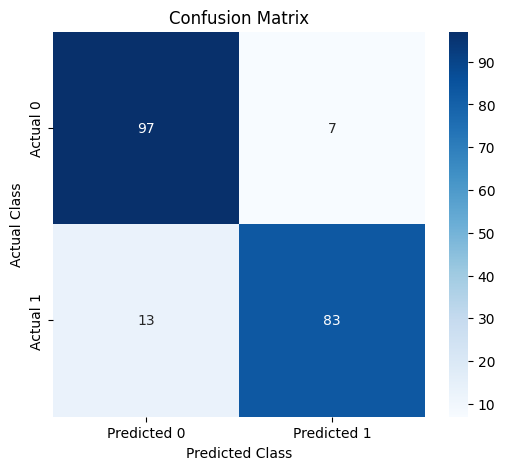

In [63]:
# 1. Confusion Matrix එක ගණනය කිරීම
cm = confusion_matrix(y_test, y_pred)

# 2. Heatmap එක ඇඳීම
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Visualization 1: Confusion Matrix (Heatmap)මෙය කුමක්ද?Model එක කොච්චර වරද්දලාද, කොච්චර හරිගස්සලාද කියලා පැහැදිලිවම පෙන්නුම් කරන වගුවක්. Classification වලදී අනිවාර්යයෙන්ම බලන visualization එකක්.

True Negative (TN): 0 (සත්‍ය) $\rightarrow$ 0 (predict කළා) - නිවැරදියි

False Positive (FP): 0 (සත්‍ය) $\rightarrow$ 1 (predict කළා) - වැරදියි

False Negative (FN): 1 (සත්‍ය) $\rightarrow$ 0 (predict කළා) - වැරදියි

True Positive (TP): 1.0 (සත්‍ය) $\rightarrow$ 1 (predict කළා) - නිවැරදියි

Code:seaborn library එක පාවිච්චි කරාම මේක ලස්සන heatmap එකක් විදියට ගන්න පුළුවන්.

1. Precision (නිරවද්‍යතාවය)තේරුම: Model එක "Class 1" (Positive) කියා predict කළොත්, එය ඇත්තටම "Class 1" වීමට ඇති සම්භාවිතාව කුමක්ද?

ප්‍රශ්නය: "ඔබ 1 කියා predict කළ ඒවායින් (TP+FP), කීයක් ඇත්තටම 1 ද (TP)?

සමීකරණය:$$\text{Precision} = \frac{TP}{TP + FP}$$


2. Recall (පුනරාවර්තනය / Sensitivity)තේරුම: ඇත්තටම "Class 1" (Positive) වූ සියලු දෙනාගෙන්, model එකට කී දෙනෙක්ව නිවැරදිව හඳුනාගැනීමට හැකි වුණාද?

ප්‍රශ්නය: "ඇත්තටම 1 වූ (TP+FN) අයගෙන්, කී දෙනෙක්ව ඔබ 1 කියා හඳුනා ගත්තාද (TP)?

සමීකරණය:$$\text{Recall} = \frac{TP}{TP + FN}$$

3. F1-Scoreතේරුම: Precision සහ Recall කියන දෙකේම සමබර සාමාන්‍යය (Harmonic Mean).ඇයි මේක ඕන?හිතන්න, model එකක් 100% Precision, ඒත් 10% Recall. තව model එකක් 80% Precision, 80% Recall. දෙවෙනි model එක සමබරයි, ඒ නිසා වඩා හොඳයි.
 F1-Score එකෙන් මේ සමබරතාවය මනිනවා.
 
 සමීකරණය:$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

In [82]:
import pandas as pd
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.88      0.93      0.91       104
     Class 1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



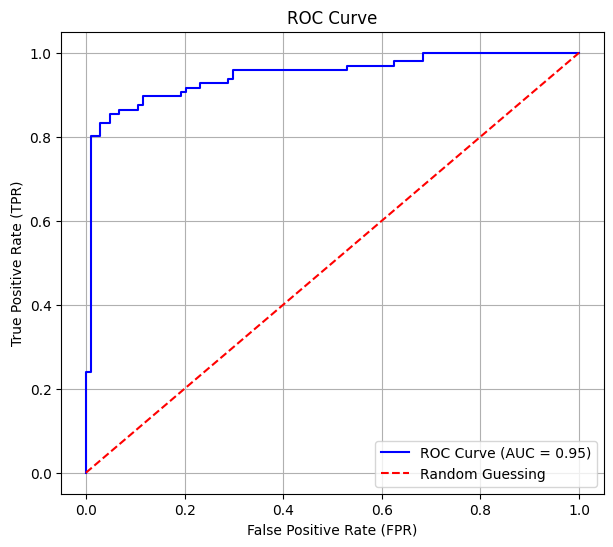

In [ ]:
# 1. ROC curve එකට අවශ්‍ය දත්ත ගණනය කිරීම
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 2. AUC (Area Under Curve) අගය ගණනය කිරීම
auc = roc_auc_score(y_test, y_pred_proba)

# 3. ප්‍රස්තාරය ඇඳීම
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()

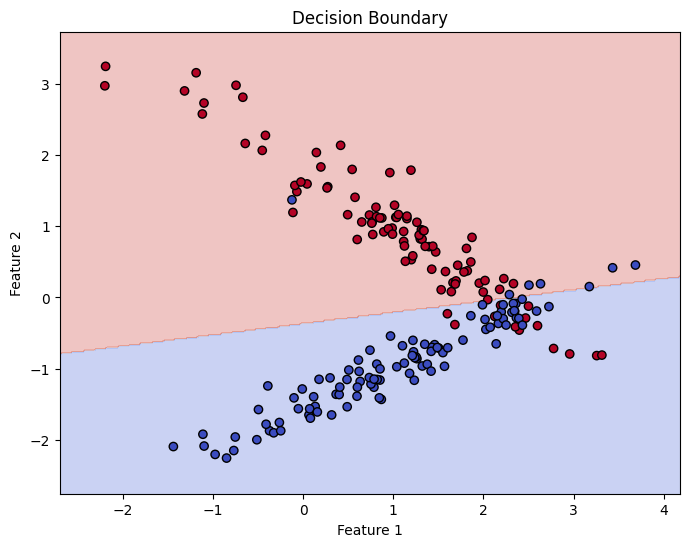

In [ ]:
# Function එකක් (plot එක පහසු කරන්න)
def plot_decision_boundary(X, y, model):
    # දත්ත වල min/max අරගෙන පොඩි padding එකක් දානවා
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Grid එකක් හදනවා (Meshgrid)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Grid එකේ හැම ලක්ෂ්‍යයකටම prediction එක ගන්නවා
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Background එක (decision regions) අඳිනවා
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    
    # Test data (ලක්ෂ්‍ය) ටික අඳිනවා
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# ප්‍රස්තාරය ඇඳීම
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_test, y_test, model)
plt.show()

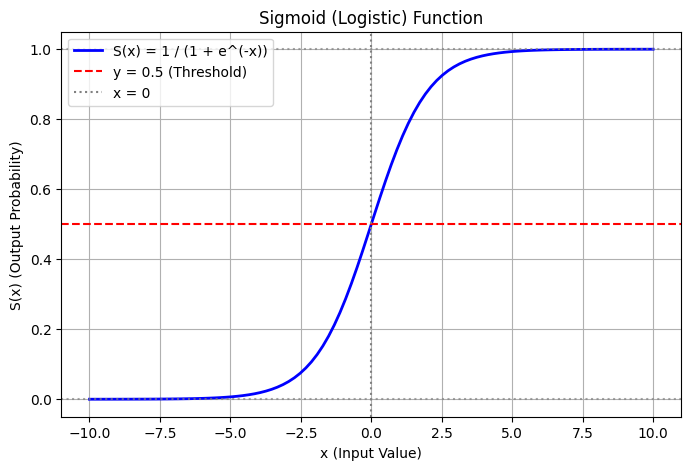

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Sigmoid function එක Python වලින් define කිරීම
def sigmoid(x):
    """
    Sigmoid function S(x) = 1 / (1 + e^(-x))
    """
    return 1 / (1 + np.exp(-x))

# 2. X අක්ෂය සඳහා දත්ත ලක්ෂ්‍ය (range) එකක් සෑදීම
#    අපි -10 සිට +10 දක්වා අගයන් 100ක් ගමු
x = np.linspace(-10, 10, 100)

# 3. Y අක්ෂය සඳහා අගයන් ගණනය කිරීම
#    සෑම x අගයක් සඳහාම ඊට අනුරූප sigmoid අගය (y) ගණනය කරමු
y = sigmoid(x)

# 4. Plot එක ඇඳීම
plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', linewidth=2, label='S(x) = 1 / (1 + e^(-x))')

# --- Plot එක තේරුම් ගැනීමට උදව් වන අමතර රේඛා ---
# y = 0.5 (threshold) රේඛාව
plt.axhline(y=0.5, color='red', linestyle='--', label='y = 0.5 (Threshold)')
# x = 0 රේඛාව
plt.axvline(x=0.0, color='gray', linestyle=':', label='x = 0')
# y = 1.0 (උපරිම සීමාව)
plt.axhline(y=1.0, color='gray', linestyle=':', alpha=0.7)
# y = 0.0 (අවම සීමාව)
plt.axhline(y=0.0, color='gray', linestyle=':', alpha=0.7)
# ---

# Labels සහ Title
plt.title('Sigmoid (Logistic) Function')
plt.xlabel('x (Input Value)')
plt.ylabel('S(x) (Output Probability)')
plt.legend()
plt.grid(True)
plt.show()